<a href="https://www.kaggle.com/code/yannicksteph/nlp-llm-fine-tuning-qa-lora-t5?scriptVersionId=159727677" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# | NLP | LLM | Fine-tuning | QA LoRA T5 |

## Natural Language Processing (NLP) and Large Language Models (LLM) with Fine-Tuning LLM and make Question answering (QA) with LoRA and Flan-T5 Large

![Learning](https://t3.ftcdn.net/jpg/06/14/01/52/360_F_614015247_EWZHvC6AAOsaIOepakhyJvMqUu5tpLfY.jpg)


# <b>1 <span style='color:#78D118'>|</span> Overview</b>

In this notebook we're going to Fine-Tuning LLM:

<img src="https://github.com/YanSte/NLP-LLM-Fine-tuning-Trainer/blob/main/img_2.png?raw=true" alt="Learning" width="50%">

Many LLMs are general purpose models trained on a broad range of data and use cases. This enables them to perform well in a variety of applications, as shown in previous modules. It is not uncommon though to find situations where applying a general purpose model performs unacceptably for specific dataset or use case. This often does not mean that the general purpose model is unusable. Perhaps, with some new data and additional training the model could be improved, or fine-tuned, such that it produces acceptable results for the specific use case.

<img src="https://github.com/YanSte/NLP-LLM-Fine-tuning-Trainer/blob/main/img_1.png?raw=true" alt="Learning" width="50%">

Fine-tuning uses a pre-trained model as a base and continues to train it with a new, task targeted dataset. Conceptually, fine-tuning leverages that which has already been learned by a model and aims to focus its learnings further for a specific task.

It is important to recognize that fine-tuning is model training. The training process remains a resource intensive, and time consuming effort. Albeit fine-tuning training time is greatly shortened as a result of having started from a pre-trained model. 

<img src="https://github.com/YanSte/NLP-LLM-Fine-tuning-Trainer/blob/main/img_3.png?raw=true" alt="Learning" width="50%">


### Overview definitions

<details>
  <summary><b>T5 Model</b></summary>  
  <br/>
  Multiple formats of FLAN-T5 models are available on Hugging Face, from small to extra-large models, and the bigger the model, the more parameters it has.

  Below are the different model sizes available from the Hugging Face model card:
  <br/>
  <img src="https://images.datacamp.com/image/upload/v1699032555/image8_241fd08d9c.png" alt="Learning" width="50%">

  FLAN-T5 variants with their parameters and memory usage

  Choosing the right model size
  The choice of the right model size among the variants of FLAN-T5 highly depends on the following criteria:

  - The specific requirements of the project
  - The available computational resources
  - The level of performance expected

</details>

<br/>

<details>
  <summary><b>Fine-Tuning with LoRA</b></summary>  
  <br/>
    Fine-tuning, a crucial aspect of adapting pre-trained models to specific tasks, has witnessed a revolutionary approach known as Low Rank Adaptation (LoRA). Unlike conventional fine-tuning methods, LoRA strategically freezes pre-trained model weights and introduces trainable rank decomposition matrices into the Transformer architecture's layers. This innovative technique significantly reduces the number of trainable parameters, leading to expedited fine-tuning processes and mitigated overfitting.

</details>

<br/>

<details>
  <summary><b>Text Generation vs Text2Text Generation</b></summary>  
  <br/>
    
  **Text Generation**:

  Text Generation, also known as Causal Language Modeling, is the process of generating text that closely resembles human writing.

  ![Text Generation using GPT-2](https://miro.medium.com/v2/resize:fit:1400/0*XDtcpv-m0SJRGSGB.png)

  It utilizes a Decoder-only architecture and operates in a left-to-right context. Text Generation is often employed for tasks such as sentence completion and generating the next lines of poetry when given a few lines as input. Examples of Text Generation models include the GPT family, BLOOM, and PaLM, which find applications in Chatbots, Text Completion, and content generation.

   ```python
   from transformers import pipeline

   task = "text-generation"
   model_name = "gpt2"
   max_output_length = 30
   num_of_return_sequences = 2
   input_text = "Hello, "

   text_generator = pipeline(task,model=model_name)

   text_generator(input_text, max_length=max_output_length, num_return_sequences=num_of_return_sequences)
   ```
  <br/>
    
  **Text2Text Generation**:

  Text-to-Text Generation, also known as Sequence-to-Sequence Modeling, is the process of converting one piece of text into another.

  ![Text2Text Generation](https://miro.medium.com/v2/resize:fit:1400/0*7_yKVuJmhFxUAGPQ.png)

  Text-to-Text Generation involves transforming input text into a desired target text, making it a versatile approach. It is commonly used in tasks such as language translation, summarization, and question-answering.

  Examples of Text-to-Text Generation models include Transformer-based architectures like T5 (Text-to-Text Transfer Transformer) and BART (Bart is not just another Reformatter).


   ```python
   from transformers import pipeline

   task = "text2text-generation"
   model_name = "t5-small"
   max_output_length = 50
   num_of_return_sequences = 2
   input_text = "Translate the following English text to French: 'Hello, how are you?'"

   text_generator = pipeline(task, model=model_name)

   text_generator(input_text, max_length=max_output_length, num_return_sequences=num_of_return_sequences)
   ```
   <br/>
   In this example, we use the T5 model from Hugging Face to perform text-to-text generation. The input text is an English sentence that we want to translate into French. The model is capable of generating multiple possible translations.

</details>

<br/>

<details>
  <summary><b>What is LoRA?</b></summary>

  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*kzZ2_LZqBO9_hTi3.png" alt="Learning" width="30%">

  LoRA represents a paradigm shift in fine-tuning strategies, offering efficiency and effectiveness. By reducing the number of trainable parameters and GPU memory requirements, LoRA proves to be a powerful tool for tailoring pre-trained large models to specific tasks. This article explores how LoRA can be employed to create a personalized chatbot.

  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*SJtZupeQVgp3s5HOBymcQw.png" alt="Learning" width="40%">
  <img src="https://github.com/YanSte/NLP-LLM-Fine-tuning-T5-Small-Reviews/blob/main/img_1.png?raw=true" alt="Learning" width="50%">
    
</details>
<br/>

<details>
  <summary><b>PeftModel vs get_peft_model?</b></summary>
  <br/>
  Note:
  1. **`PeftModel.from_pretrained`:**
    - By default, the adapter of the PEFT model is frozen (non-trainable).
    - You can change this by adjusting the `is_trainable` configuration.

  2. **`get_peft_model` function:**
    - Parameters are not frozen by default.
    - Result: you obtain a trainable PEFT model for the SFT task.

  3. **Fine-tuning an already fine-tuned PEFT model:**
    - Utilize `from_pretrained`.
    - Set `is_trainable = True` to enable training of the previously fine-tuned model.
</details>

<br/>

<details>
  <summary><b>What is ROUGE score?</b></summary>
  <br/>
  ROUGE stands for Recall-Oriented Understudy for Gisting Evaluation. Some key components of ROUGE for question-answering include:
  - ROUGE-L: Measures the longest common subsequence between the candidate and reference answers. This focuses on recall of the full text.
  - ROUGE-1, ROUGE-2, ROUGE-SU4: Compare unigram, bigram, 4-gram overlaps between candidate and reference. Focus on recall of key parts/chunks

  Higher ROUGE scores generally indicate better performance for question answering. Scores close to or above 0.70+ are considered strong
  When using this metric, processing like stemming, and removing stopwords can help improve the overall performance
</details>

<br/>

### Prompt Datasets

The utilization of chat prompts during the fine-tuning of a T5 model holds crucial significance due to several inherent advantages associated with the conversational nature of such data. Here is a more detailed explanation of using chat prompts in this context:

1. **Simulation of Human Interaction:** Chat prompts enable the simulation of human interactions, mirroring the dynamics of a real conversation. This approach facilitates the model's learning to generate responses that reflect the fluidity and coherence inherent in human exchanges.

2. **Contextual Awareness:** Chat prompts are essential for capturing contextual nuances in conversations. Each preceding turn of speech influences the understanding and generation of responses. The use of these prompts allows the model to grasp contextual subtleties and adjust its responses accordingly.

3. **Adaptation to Specific Language:** By incorporating chat prompts during fine-tuning, the model can adapt to specific languages, unique conversational styles, and even idiosyncratic expressions. This enhances the model's proficiency in generating responses that align with the particular expectations of end-users.

4. **Diversity in Examples:** Conversations inherently exhibit diversity, characterized by a variety of expressions, tones, and linguistic structures. Chat prompts inject this diversity into the training process, endowing the model with the ability to handle real-world scenarios and adapt to the richness of human interactions.

Using Chat prompts during the fine-tuning of a T5 model represents a potent strategy to enhance its capability in understanding and generating conversational texts. These prompts act as a bridge between training data and real-life situations, thereby strengthening the model's performance in applications such as chatbot response generation, virtual assistant systems, and other natural language processing tasks.

### Model Details

T5 is an encoder-decoder model pre-trained on a multi-task mixture of unsupervised and supervised tasks and for which each task is converted into a **text-to-text** format.

### Training procedure

Since, T5 is a text-to-text model, the labels of the dataset are converted as follows: For each example, a sentence as been formed as "Question sentence: " + Answer sentence.

## Learning Objectives

By the end of this notebook, you will gain expertise in the following areas:

1. Learn how to effectively prepare datasets for training.
2. Understand the process of fine-tuning the T5 model manually, without relying on the Trainer module.
3. Explore the usage of accelerators to optimize model training and inference.
4. Evaluate the performance of your model using metrics such as Rouge scores.


# Setup

In [1]:
%%capture
!pip install -U torch torchvision evaluate transformers datasets accelerate peft deepspeed rouge-score

In [2]:
import torch
assert torch.cuda.is_available()

In [3]:
###### General ######
import os
import gc
import platform
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

###### Torch ######

import torch
from torch.utils.data import DataLoader

###### Hugging face ######

# Hub
# --
from huggingface_hub import login

# Dataset
# --
from datasets import Dataset, DatasetDict, load_dataset, load_metric
import datasets

# Transformers
# --
from transformers import pipeline, T5ForConditionalGeneration, AutoTokenizer, AutoConfig, default_data_collator, get_linear_schedule_with_warmup, DataCollatorForSeq2Seq, set_seed
import transformers

# Perf
# --
from peft import LoraConfig, TaskType, get_peft_model, get_peft_model_state_dict, PeftModel
from peft.utils.other import fsdp_auto_wrap_policy
from peft import PeftConfig

# Accelerator
# --
from accelerate import Accelerator

# Rouge score
# --
import evaluate
import nltk

###### Kaggle ######

# Kaggle
# --
from kaggle_secrets import UserSecretsClient

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Config

In [4]:
# Hugging face
# ---
hub_repo_name="YanSte/t5_large_fine_tuning_lora_question_answering_hc3_and_chatgpt_prompts"

# General
# ---
cache_dir = "./cache"
seed = 42

# Model
# ---
model_name_or_path = "google/flan-t5-large"#"google/flan-t5-xxl"

# Data formatting  
# ---
prefix = "Answer this question: "# We prefix our task

# Data formatting and tokenization 
# ---
tokenizer_input_max_tokens = 256
tokenizer_output_max_tokens = 256
tokenizer_num_proc=16

# DataLoader
# ---
data_loader_batch_size = 4

# Lora
# ---
lora_task_type=TaskType.SEQ_2_SEQ_LM
lora_inference_mode=False
lora_r=8
lora_alpha=32
lora_dropout=0.1

# Model
# ---
lr = 1e-4
num_epochs = 3

def get_peft_model_name_or_path(model_name_or_path, peft_config): 
    return f"{model_name_or_path}_{peft_config.peft_type}_{peft_config.task_type}".replace("/", "_")

def get_optimizer(model, lr):
    return torch.optim.AdamW(model.parameters(), lr=lr)


# Pipeline
# ---
pipeline_task = "text2text-generation"
pipeline_min_length=20
pipeline_temperature=0.3
pipeline_max_length=256

In [5]:
login(token=UserSecretsClient().get_secret("HUGGINGFACEHUB_API_TOKEN"))

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.

Token is valid (permission: write).

Your token has been saved to /root/.cache/huggingface/token

Login successful


In [6]:
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024"

#### Setup

In [7]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [8]:
set_seed(seed)

Accelerator

In [9]:
accelerator = Accelerator()

# Or
# Initialize accelerator with config from configs/accelerate_ds_z3.yaml
# accelerator = (
#     Accelerator(log_with=args.report_to, logging_dir=args.output_dir) if args.with_tracking else Accelerator()
# )

Log

In [10]:
datasets.utils.logging.set_verbosity_error()
transformers.utils.logging.set_verbosity_error()   

Rouge metric

In [11]:
# Download NLTK punkt tokenizer
nltk.download("punkt", quiet=True)

# Load ROUGE metric
rouge_metric = evaluate.load("rouge")

#### Methods

In [12]:
def accelerator_print_sep(accelerator=accelerator):
    sep = "#" * 12
    accelerator.print(sep)
    
def clear_gpu_memory():
    """Clear GPU memory by emptying the cache and collecting garbage."""
    torch.cuda.empty_cache()
    gc.collect()
    
def print_system_specs():
    # Check if CUDA is available
    is_cuda_available = torch.cuda.is_available()
    print("CUDA Available:", is_cuda_available)
# Get the number of available CUDA devices
    num_cuda_devices = torch.cuda.device_count()
    print("Number of CUDA devices:", num_cuda_devices)
    if is_cuda_available:
        for i in range(num_cuda_devices):
            # Get CUDA device properties
            device = torch.device('cuda', i)
            print(f"--- CUDA Device {i} ---")
            print("Name:", torch.cuda.get_device_name(i))
            print("Compute Capability:", torch.cuda.get_device_capability(i))
            print("Total Memory:", torch.cuda.get_device_properties(i).total_memory, "bytes")
    # Get CPU information
    print("--- CPU Information ---")
    print("Processor:", platform.processor())
    print("System:", platform.system(), platform.release())
    print("Python Version:", platform.python_version())

#### Specs

In [13]:
print_system_specs()

CUDA Available: True

Number of CUDA devices: 1

--- CUDA Device 0 ---

Name: Tesla P100-PCIE-16GB

Compute Capability: (6, 0)

Total Memory: 17066885120 bytes

--- CPU Information ---

Processor: x86_64

System: Linux 5.15.133+

Python Version: 3.10.12


# <b>2 <span style='color:#78D118'>|</span> Fine-Tuning</b>

### Step 1 - Data Preparation

The first step of the fine-tuning process is to identify a specific task and supporting dataset.

We will use two datasets:

[Hello-SimpleAI/HC3](https://huggingface.co/datasets/Hello-SimpleAI/HC3?source=post_page-----d7817b77fac0--------------------------------)

and

[MohamedRashad/ChatGPT-prompts](https://huggingface.co/datasets/MohamedRashad/ChatGPT-prompts?source=post_page-----d7817b77fac0--------------------------------)

In [29]:
hello_dataset = load_dataset("Hello-SimpleAI/HC3", name="all")
hc3_dataset = load_dataset("MohamedRashad/ChatGPT-prompts")

Generating train split:   0%|          | 0/24322 [00:00<?, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [30]:
hc3_dataset

DatasetDict({
    train: Dataset({
        features: ['human_prompt', 'chatgpt_response'],
        num_rows: 360
    })
})

In [31]:
hello_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'human_answers', 'chatgpt_answers', 'source'],
        num_rows: 24322
    })
})

In [32]:
hello_df, hc3_df = pd.DataFrame(hello_dataset['train']), pd.DataFrame(hc3_dataset['train'])

# Test
# ---
#hello_df, hc3_df = hello_df.iloc[:10], hc3_df.iloc[:10]

In [44]:
questions, answers = [], []

# Process Hello DataFrame
for _, row in hello_df.iterrows():
    
    for answer in row["human_answers"]:
        questions.append(row["question"])
        answers.append(answer)
        
    for answer in row["chatgpt_answers"]:
        questions.append(row["question"])
        answers.append(answer)

# Process Hc3 DataFrame
for _, row in hc3_df.iterrows():
    human_prompt = row["human_prompt"]
    chatgpt_response = row["chatgpt_response"]
    questions.append(human_prompt)
    answers.append(chatgpt_response)

# Create a new DataFrame
df = pd.DataFrame()
df["question"] = questions
df["answer"] = answers

# Save to CSV file
df.to_csv("./train.csv", index=False)

In [34]:
df.head()

,question,answer
0,"Why is every book I hear about a "" NY Times # 1 Best Seller "" ? ELI5 : Why is every book I hear about a "" NY Times # 1 Best Seller "" ? Should n't there only be one "" # 1 "" best seller ? Please explain like I'm five.","Basically there are many categories of "" Best Seller "" . Replace "" Best Seller "" by something like "" Oscars "" and every "" best seller "" book is basically an "" oscar - winning "" book . May not have won the "" Best film "" , but even if you won the best director or best script , you 're still an "" oscar - winning "" film . Same thing for best sellers . Also , IIRC the rankings change every week or something like that . Some you might not be best seller one week , but you may be the next week . I ..."
1,"Why is every book I hear about a "" NY Times # 1 Best Seller "" ? ELI5 : Why is every book I hear about a "" NY Times # 1 Best Seller "" ? Should n't there only be one "" # 1 "" best seller ? Please explain like I'm five.","If you 're hearing about it , it 's because it was a very good or very well - publicized book ( or both ) , and almost every good or well - publicized book will be # 1 on the NY Times bestseller list for at least a little bit . Kindof like how almost every big or good movies are # 1 at the box office on their opening weekend ."
2,"Why is every book I hear about a "" NY Times # 1 Best Seller "" ? ELI5 : Why is every book I hear about a "" NY Times # 1 Best Seller "" ? Should n't there only be one "" # 1 "" best seller ? Please explain like I'm five.","One reason is lots of catagories . However , how the NY Times calculates its best seller list is n't comprehensive , and is pretty well understood by publishers . So publishers can [ buy a few books ] ( URL_0 ) in the right bookstores and send a book to the top of the list for at least a week ."
3,"Why is every book I hear about a "" NY Times # 1 Best Seller "" ? ELI5 : Why is every book I hear about a "" NY Times # 1 Best Seller "" ? Should n't there only be one "" # 1 "" best seller ? Please explain like I'm five.","There are many different best seller lists that are published by various organizations, and the New York Times is just one of them. The New York Times best seller list is a weekly list that ranks the best-selling books in the United States based on sales data from a number of different retailers. The list is published in the New York Times newspaper and is widely considered to be one of the most influential best seller lists in the book industry. \nIt's important to note that the New York Ti..."
4,"If salt is so bad for cars , why do we use it on the roads ? As the title states , why do we use it ? is there no other option or what ? Please explain like I'm five.","salt is good for not dying in car crashes and car crashes are worse for cars then salt . Some places use other things , but salt is really cheap compared to most alternatives , although sand is pretty good ."


In [20]:
dataset = Dataset.from_pandas(df, split='train')

Once the data is acquired, it is split into training and testing datasets, respectively, at the proportion of 70% and 30%, and this is achieved using the train_test_split function.

In [21]:
dataset = dataset.train_test_split(shuffle=True, test_size=0.3, seed=seed)
test_ds = dataset.pop("test")
dataset["validation"] = test_ds

In [22]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 60066
    })
    validation: Dataset({
        features: ['question', 'answer'],
        num_rows: 25743
    })
})

In [23]:
pd.DataFrame(dataset[:15]).head(15)

,question,answer
0,"What causes cough with bloody phlegm and vomiting?Hi there, I've got a 4 year old and he's prone to getting bronchitus when he has a cold, hes been coughing for 3 days now, since last night its been very heavy and flemmy, been vomiting because of the flem, he coughed up some blood with some flem a few minutes ago, should i be worried or is it just that he's been coughing so much? Thanks",Hi.... I understand your concern. As the kid otherwise normal I feel that it could be because of intense cough that he has this blood streaks in the sputum. But if there is any family history of tuberculosis contact then definitely this required for the evaluation.I suggest that you get him checked by his pediatrician once.Regards - Dr. Sumanth
1,"Will a therapy make my husbands loose hand stiff?My husband had a stroke 1 year ago. We did not have any insurance, but he still got some therapy, not with rehap though. He went for 3 months. He did good, but without insurance, we had to stop. His hand is still loose, can he still get therapy and will it help him. We have insurance now. Aida","It's possible that therapy may help improve the stiffness and function of your husband's hand after a stroke. However, it's important to note that the effectiveness of therapy can depend on many factors, including the severity and location of the stroke, the amount of time that has passed since the stroke, and the overall health and physical condition of the individual.\n\nIt's important to speak with a healthcare professional, such as a physical therapist or occupational therapist, to deter..."
2,"What 's outside the universe They say it 's always expanding , what lays beyond the universe ? Black space ? I 'll use this picture to clear things up . [ Example ] ( URL_0 ) Explain like I'm five.","The universe is everything that exists, so there is nothing ""outside"" of it. The universe is expanding, which means that the space between galaxies is getting bigger. This expansion is happening everywhere, so there is no particular ""edge"" of the universe that we can point to and say, ""This is where the universe ends and something else begins."" The concept of ""black space"" or ""empty space"" is also a little bit tricky. Even though there might not be any stars or galaxies in a particular regio..."
3,"How to properly do laundry . I 've never been able to confront this because of the sheer risk of ruining my clothes . But the time has come and I MUST learn . I 've read some articles online , but none have really helped . Explain like I'm five.","OK , most posts are helpful but IMHO not complete . You need a washing machine and knowledge of 2 main settings : * The first is a low temperature wash used for colours and delicate items . This is normally around 30 - 40 degree Celsius ( about 100 Fahrenheit ) . * The second is a high temperature wash used for white items and light bed linen . The hot temperatures help to get the bright white back and kill any bed bugs . This can be up to 90 degrees Celsius ( about 180 Fahrenheit ) but caus..."
4,"If diamonds are n't that rare , why are they so expensive ? Even the uncut diamonds are expensive Explain like I'm five.","In addition to these correct answers , you may be interested to know that 84 % of diamonds in the world move through the [ Antwerp Diamond District ] ( URL_0 ) . It is essentially a mafia - esque family controlled diamond cutting organization . You have to be born into the society in order to work for them . They are not obligated to say how many diamonds they have . They can dictate the prices however they like . Additionally , they can easily hide ' blood diamonds ' among other uncut stones ."
5,Binary search algorithm I ca n't understand this at all . ELI5 ? Thanks ! Explain like I'm five.,"Sure! Imagine you have a list of numbers and you want to find a specific number in that list. One way to do this would be to start at the beginning of the list and look at each number one by one unti

### Step 2 - Model and Tokenizer initialization


In [24]:
model = T5ForConditionalGeneration.from_pretrained(model_name_or_path, cache_dir=cache_dir)

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, cache_dir=cache_dir)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

### Step 3 - Data formatting and tokenization



We have a significant amount of data in both training and testing datasets for the fine-tuning process. 

But, before that we need to process the data to fit the fine-tuning format.

During the inference mode, the process of calling the model will be in this format:
```
“Answer this question: <USER_QUESTION>”
```
Where the ```<USER_QUESTION>``` is the question the user would like the answer about. To achieve that functionality, we need to format the training data by prefixing the task with the string ```“Answer this question”``` and this is done with the preprocess_function function below.

In addition to the formatting, the function also applies the tokenization of the inputs and outputs using the tokenizer function.


In [25]:
def preprocess_tokenize(examples):
    inputs = [prefix + doc for doc in examples["question"]]
    
    model_inputs = tokenizer(
        inputs, 
        max_length=tokenizer_input_max_tokens, 
        padding=True, 
        truncation=True
    )

    # Setup the tokenizer for targets
    labels = tokenizer(
        examples["answer"], 
        max_length=tokenizer_output_max_tokens, 
        padding=True, 
        truncation=True
    )

    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs

In [26]:
with accelerator.main_process_first():
    processed_datasets = dataset.map(
        preprocess_tokenize,
        batched=True,
        num_proc=tokenizer_num_proc,
        remove_columns=dataset["train"].column_names,
        load_from_cache_file=False,
        desc="Running tokenizer on dataset",
    )


del dataset

train_dataset = processed_datasets["train"]
eval_dataset = processed_datasets["validation"]    

Running tokenizer on dataset (num_proc=16):   0%|          | 0/60066 [00:00<?, ? examples/s]

Running tokenizer on dataset (num_proc=16):   0%|          | 0/25743 [00:00<?, ? examples/s]

In [27]:
train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 60066
})

In [28]:
eval_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 25743
})

### Step 4 - DataLoader

In [29]:
train_dataloader = DataLoader(
    train_dataset, 
    shuffle=True, 
    collate_fn=data_collator, 
    batch_size=data_loader_batch_size, 
    pin_memory=True
)

eval_dataloader = DataLoader(
    eval_dataset, 
    collate_fn=data_collator, 
    batch_size=data_loader_batch_size, 
    pin_memory=True
)

#### Cleaning Memory

In [30]:
clear_gpu_memory()

### Step 5 - Lora


Description of each argument for the `LoraConfig` class in the `peft` module:

1. **`r` (int, default=8):**  
   Dimension/Rank of the LoRA decomposition. For each layer to be trained, the weight update matrix \( \Delta W \) of dimension \( d \times k \) is represented by a low-rank decomposition \( BA \), where \( B \) is a \( d \times r \) matrix and \( A \) is an \( r \times k \) matrix. The rank of the decomposition \( r \) is typically much smaller than the minimum between \( d \) and \( k \). The default value for \( r \) is 8.
   
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EnUd1eXLvXCxRZj9NW2BeA.png" alt="Learning" width="50%">

2. **`lora_alpha` (float, default=8):**  
   Alpha parameter for LoRA scaling. According to the LoRA paper, \( \Delta W \) is scaled by \( \alpha / r \), where \( \alpha \) is a constant. When optimizing with Adam, setting \( \alpha \) is roughly the same as setting the learning rate if initialization has been appropriately scaled. The default value for \( \alpha \) is 8.

3. **`target_modules` (list of str, default=None):**  
   Modules to apply LoRA on. You can select specific modules to fine-tune. This is a list of module names such as "q" (query module) and "v" (value module). The default is `None`, which means LoRA will be applied to all layers of the model.

4. **`lora_dropout` (float, default=0.01):**  
   Dropout rate for LoRA weights. This parameter controls the probability of zeroing out elements in the \( B \) matrix during training, helping to regularize the model. The default value is 0.01.

5. **`bias` (str, default="none"):**  
   Bias can be ‘none’, ‘all’ or ‘lora_only’. If ‘all’ or ‘lora_only’, the corresponding biases will be updated during training. Even when disabling the adapters, the model will not produce the same output as the base model would have without adaptation. The default is None.

6. **`task_type` (str, default="SEQ_2_SEQ_LM"):**  
   Task type. This is the type of task for which the model is fine-tuned. Possible options include "SEQ_2_SEQ_LM" (Sequence-to-Sequence Language Model) and other specific task types. The default is "SEQ_2_SEQ_LM".

These parameters allow customization of the LoRA fine-tuning behavior to fit specific application needs.

In [31]:
peft_config = LoraConfig(
    r=lora_r, 
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    task_type=lora_task_type, 
    inference_mode=lora_inference_mode
)

In [32]:
model = get_peft_model(model, peft_config)
accelerator_print_sep()
accelerator.print(model.print_trainable_parameters())
accelerator_print_sep()

############

trainable params: 2,359,296 || all params: 785,509,376 || trainable%: 0.30035236651331837

None

############


### Step 6 -  Learning Ratescheduler

In [33]:
# Setup optimizer
optimizer = get_optimizer(model, lr)    

In [34]:
lr_scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=(len(train_dataloader) * num_epochs),
)

In [35]:
if getattr(accelerator.state, "fsdp_plugin", None) is not None:
    accelerator.state.fsdp_plugin.auto_wrap_policy = fsdp_auto_wrap_policy(model)

### Step 7 -  Accelerator setup

In [36]:
model, train_dataloader, eval_dataloader, optimizer, lr_scheduler = accelerator.prepare(
    model, 
    train_dataloader, 
    eval_dataloader, 
    optimizer, 
    lr_scheduler
)

### DeepSpeed

This code is designed to determine whether the model is currently using the third stage of the DeepSpeed decentralization process (zero_stage). DeepSpeed is a library that optimizes training models on distributed architectures, particularly on GPUs.

Detailed explanations:
- `accelerator`: It seems to refer to an object that manages hardware acceleration, possibly provided by the Hugging Face Accelerated Inference API.
- `accelerator.state`: Accesses the internal state of the accelerator object.
- `accelerator.state.deepspeed_plugin`: If DeepSpeed is in use, this accesses the object representing the DeepSpeed plugin within the accelerator state.
- `accelerator.state.deepspeed_plugin.zero_stage`: Accesses the current stage of the DeepSpeed decentralization process.

In [37]:
is_ds_zero_3 = False
if getattr(accelerator.state, "deepspeed_plugin", None):
    is_ds_zero_3 = accelerator.state.deepspeed_plugin.zero_stage == 3

### Step 7 -  Train

In [38]:
def train_epoch(model, train_dataloader, optimizer, lr_scheduler, accelerator):
    """
    Train the model for one epoch.
    """
    model.train()
    total_loss = 0

    for step, batch in enumerate(tqdm(train_dataloader, disable=not accelerator.is_main_process)):
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.detach().float()
        accelerator.backward(loss)
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    return total_loss / len(train_dataloader)

def evaluate_epoch(model, eval_dataloader, tokenizer, accelerator):
    """
    Evaluate the model on the validation dataset for one epoch.
    """
    model.eval()
    eval_loss = 0
    eval_preds = []

    for step, batch in enumerate(tqdm(eval_dataloader, disable=not accelerator.is_main_process)):
        with torch.no_grad():
            outputs = model(**batch)

        loss = outputs.loss
        eval_loss += loss.detach().float()
        preds = accelerator.gather_for_metrics(torch.argmax(outputs.logits, -1)).detach().cpu().numpy()
        eval_preds.extend(tokenizer.batch_decode(preds, skip_special_tokens=True))

    return eval_loss / len(eval_dataloader), eval_preds

def save_model(model, peft_model_name_or_path, accelerator, hub_repo_name):
    """
    Save the model to the specified path.
    """
    accelerator.wait_for_everyone()
    model.save_pretrained(peft_model_name_or_path)
    tokenizer.save_pretrained(peft_model_name_or_path)
    model.push_to_hub(hub_repo_name)
    tokenizer.push_to_hub(hub_repo_name)
    accelerator.wait_for_everyone()
    
def plot_loss(train_losses, eval_losses):
    """
    Plot training and validation losses.
    """
    plt.figure(figsize=(10, 6))
    
    # Move tensors to CPU
    train_losses_cpu = [loss.cpu().item() for loss in train_losses]
    eval_losses_cpu = [loss.cpu().item() for loss in eval_losses]
    
    epochs = range(1, len(train_losses_cpu) + 1)
    
    plt.plot(epochs, train_losses_cpu, label='Training Loss')
    plt.plot(epochs, eval_losses_cpu, label='Validation Loss')
    
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [39]:
peft_model_name_or_path = get_peft_model_name_or_path(model_name_or_path, peft_config)

train_losses = []
eval_losses = []
rouge_scores = []

# Main training loop
for epoch in range(num_epochs):
    # Train
    # ---
    accelerator_print_sep()
    accelerator.print(f"Train epoch: {epoch=}")
    
    train_loss = train_epoch(model, train_dataloader, optimizer, lr_scheduler, accelerator)
    train_ppl = torch.exp(train_loss)
    
    accelerator_print_sep()
    accelerator.print(f"{epoch=}: {train_ppl=} {train_loss=}")
    
    train_losses.append(train_loss)

    # Eval
    # ---
    accelerator_print_sep()
    accelerator.print(f"Eval epoch: {epoch=}")
    
    eval_loss, eval_preds = evaluate_epoch(model, eval_dataloader, tokenizer, accelerator)
    eval_ppl = torch.exp(eval_loss)
    
    accelerator_print_sep()
    accelerator.print(f"{epoch=}: {eval_ppl=} {eval_loss=}")
    
    eval_losses.append(eval_loss)

    # Save
    # ---
    accelerator_print_sep()
    accelerator.print(f"Save epoch: {epoch=}")
    save_model(model, peft_model_name_or_path, accelerator, hub_repo_name)

############

Train epoch: epoch=0


100%|██████████| 15017/15017 [2:51:51<00:00,  1.46it/s]


############

epoch=0: train_ppl=tensor(5.2786, device='cuda:0') train_loss=tensor(1.6637, device='cuda:0')

############

Eval epoch: epoch=0


100%|██████████| 6436/6436 [29:42<00:00,  3.61it/s]


############

epoch=0: eval_ppl=tensor(3.7711, device='cuda:0') eval_loss=tensor(1.3274, device='cuda:0')

############

Save epoch: epoch=0


adapter_model.safetensors:   0%|          | 0.00/9.48M [00:00<?, ?B/s]

############

Train epoch: epoch=1


100%|██████████| 15017/15017 [2:52:03<00:00,  1.45it/s]


############

epoch=1: train_ppl=tensor(4.1654, device='cuda:0') train_loss=tensor(1.4268, device='cuda:0')

############

Eval epoch: epoch=1


100%|██████████| 6436/6436 [29:44<00:00,  3.61it/s]


############

epoch=1: eval_ppl=tensor(3.7025, device='cuda:0') eval_loss=tensor(1.3090, device='cuda:0')

############

Save epoch: epoch=1


adapter_model.safetensors:   0%|          | 0.00/9.48M [00:00<?, ?B/s]

############

Train epoch: epoch=2


100%|██████████| 15017/15017 [2:51:49<00:00,  1.46it/s]


############

epoch=2: train_ppl=tensor(4.1065, device='cuda:0') train_loss=tensor(1.4126, device='cuda:0')

############

Eval epoch: epoch=2


100%|██████████| 6436/6436 [29:44<00:00,  3.61it/s]


############

epoch=2: eval_ppl=tensor(3.6838, device='cuda:0') eval_loss=tensor(1.3039, device='cuda:0')

############

Save epoch: epoch=2


adapter_model.safetensors:   0%|          | 0.00/9.48M [00:00<?, ?B/s]

#### Plot

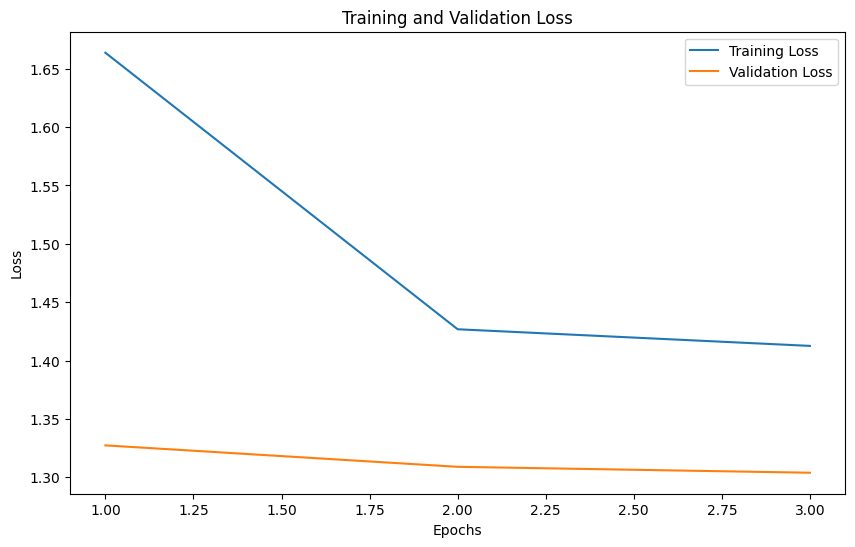

In [40]:
plot_loss(train_losses, eval_losses)

#### Cleaning Memory

In [41]:
del model
del train_losses
del eval_losses
del rouge_scores
del lr_scheduler
del optimizer
del peft_config
del train_dataloader
del eval_dataloader
del tokenizer
del data_collator

clear_gpu_memory()

# <b>3 <span style='color:#78D118'>|</span> Performance Evaluation</b>

### Step 1 - Load model and apply Perf

In [42]:
# Local Load
# ----
# Load Model
#tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
#model = T5ForConditionalGeneration.from_pretrained(model_name_or_path)

# Apply Perf
#finetuned_model = PeftModel.from_pretrained(model, peft_model_name_or_path, device_map={"":0})

# Hub Load
# ----
tokenizer = AutoTokenizer.from_pretrained(hub_repo_name)
finetuned_model = T5ForConditionalGeneration.from_pretrained(hub_repo_name)

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/9.48M [00:00<?, ?B/s]

In [43]:
finetuned_model.eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): lora.Linear(
                (base_layer): Linear(in_features=1024, out_features=1024, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.1, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=1024, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=1024, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k): Linear(in_features=1024, out_features=1024, bias=False)
         

### Step 2 - Pipeline

In [44]:
text_generation_pipeline = pipeline(
    task=pipeline_task,
    model=finetuned_model,
    tokenizer=tokenizer,
    truncation=True,
    max_length=pipeline_max_length,
    min_length=pipeline_min_length,
    temperature=pipeline_temperature,
    device=0 # Set device to 0 for GPU, -1 for CPU
)  

# Note: We foce using Pipeline with the warning in local

### Step 3 - Evaluation

In [26]:
questions = [
    
    ## Linked questions
    "How do companies profit from war?",
    "Why do U.S. companies rebuild towns after wars?",
    "Is there a World War Hulk movie in production?",
    "What is the concept of paying off the principal of a home vs. investing in a mutual fund?",
    "I'm making real money for the first time, what should I do with it?",
    "How are the first days of each season chosen?",
    "Why are laws requiring identification for voting scrutinized by the media?",
    "Why aren't there many new operating systems being created?",
    "How can schools keep students after the normal school day?",
    "What are the duties of military personnel stationed in peaceful countries?",
    "Why did the world's magnetic field reverse 780,000 years ago?",
    "What is Sherlock Holmes' job?",
    "Explain the fifthworldproblems subreddit like I'm five.",
    "Why were Shaq and Kobe seen as rivals despite winning three finals in a row?",
    "If a filter-feeding whale swallows a turtle, can it digest it normally?",
    "Why does the pubic region have darker skin than the rest of the body?",
    "How does the Military-Industrial Complex work?",
    "Why is there no World War Hulk movie in production?",
    "What factors should be considered when deciding to pay off a home or invest in a mutual fund?",
    "What is a Roth IRA, and why is it a good idea to open one?",
    
    ## Generic questions
    "How do ants decide where to build their colonies?",
    "What would happen if all the bees disappeared from the Earth?",
    "Can robots ever have feelings like humans?",
    "If animals could talk, which species do you think would be the most chatty?",
    "What would a world without gravity be like?",
    "If you could time travel, would you go to the past or the future?",
    "How do plants know when it's time to bloom?",
    "If you could have any superpower, what would it be and why?",
    "What if our dreams were actually glimpses of alternate realities?",
    "How do birds know where to migrate each year?",
    "If you could create a new color, what would you name it?",
    "What if everyone on Earth spoke the same language?",
    "How would life be different if humans had tails?",
    "If you could be any fictional character for a day, who would you choose?",
    "What if we discovered a parallel universe right next to ours?",
    "How do animals in the wild know which plants are safe to eat?",
    "If you could design a new planet, what features would it have?",
    "What if we could communicate with dolphins?",
    "How do clouds decide when to rain?",
    "If you could swap lives with any person for a week, who would it be and why?"
]

In [27]:
transformed_questions = [prefix + question for question in questions]

generated_texts = text_generation_pipeline(transformed_questions, do_sample=True)

In [28]:
predictions = [output_text["generated_text"] for output_text in generated_texts]
references = [input_text.split(":")[-1].strip() for input_text in questions]

data = []
for question, generated_text in zip(questions, generated_texts):
    data.append({
        "Input": question.split(":")[-1].strip(),
        "Output": generated_text["generated_text"]
    })

df = pd.DataFrame(data)

display(df)

,Input,Output
0,How do companies profit from war?,"It is not clear whether companies profit from war, but it is possible that they do. Some companies may profit from the war by acquiring or acquiring other companies, such as military equipment manufacturers, or by selling their products to other companies. Some companies may also profit from the war by acquiring other companies, such as military equipment manufacturers, or by selling their products to other companies. It is important to note that the effects of war on companies can vary sign..."
1,Why do U.S. companies rebuild towns after wars?,"It's not clear why U.S. companies rebuild towns after wars, but it's possible that they do it to help the economy and create jobs. Some companies, such as the United States Army Corps of Engineers (ACE), have been involved in rebuilding cities and towns in the past, and they have been successful in doing so. Some companies, such as the United States Navy Corps of Engineers (USNAC), have been involved in rebuilding cities and towns in the past, and they have been successful in doing so. It's ..."
2,Is there a World War Hulk movie in production?,"There is no World War Hulk movie in production. However, there are several films that are currently in production, including the film ""The Incredible Hulk"" (1987), ""The Incredible Hulk: The Return of the Incredible Hulk"" (1987), ""The Incredible Hulk: The Return of the Incredible Hulk"" (1990), and ""The Incredible Hulk: The Return of the Incredible Hulk"" (1991). These films are all based on the comic book series ""The Incredible Hulk"" by Stan Lee and Jack Kirby."
3,What is the concept of paying off the principal of a home vs. investing in a mutual fund?,"The concept of paying off the principal of a home versus investing in a mutual fund is that the money you pay off the principal of a home is used to pay off other debts, such as mortgages, student loans, and other financial obligations. The principle of paying off the principal of a home is that the money you pay off the principal of a home is used to pay off other debts, such as student loans, mortgages, and other financial obligations. In contrast, investing in a mutual fund is a different..."
4,"I'm making real money for the first time, what should I do with it?","I'm making real money for the first time, and I'd like to start investing in stocks and mutual funds. Here are some things you can do with your new money:Invest in stocks and mutual funds: Stocks and mutual funds are a great way to invest your money, as they are very stable and can grow over time. You can invest in stocks and mutual funds for a variety of reasons, including: Investing in stocks and mutual funds can be a great way to invest your money, as they are very safe and can grow over ..."
5,How are the first days of each season chosen?,"The first days of each season are chosen by a number of factors, including the weather, the weather forecast, and the availability of resources.nnThe first days of each season are chosen by the weather forecasters, who use a variety of factors to determine the best time to arrive at the game. For example, the forecasters may use a combination of factors, such as the weather, the weather forecast, and the availability of resources.nnThe first days of each season are chosen by the weather fore..."
6,Why are laws requiring identification for voting scrutinized by the media?,"The media is a powerful tool for determining the legitimacy of laws and policies that affect the way people vote. It can help to ensure that laws are being enforced in a fair and fair manner, and that people are being able to exercise their right to vote in a way that is fair and legitimate. One reason that laws requiring identification for voting may be scrutinized by the media is to ensure that people are being able to vote in a way that is fair and legitimate. This can help to ensure that..."
7,Why aren't there many new operating systems being created?,There are a f

#### Evaluation with Rouge

In [45]:
df_question = df.sample(n=30, random_state=seed) 

In [46]:
questions = [prefix + question for question in df_question['question']]

answers = df_question['answer']

questions = [prefix + question for question in questions]

generated_texts = text_generation_pipeline(questions, do_sample=True)

In [47]:
# Calculating Rouge scores
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []
rouge_lsum_scores = []

data = []
for question, answers, generated_text in zip(questions, answers, generated_texts):
    rouge_result = rouge_metric.compute(predictions=[generated_text["generated_text"]], references=[answers.split(":")[-1].strip()])
    
    rouge_1_scores.append(rouge_result['rouge1'])
    rouge_2_scores.append(rouge_result['rouge2'])
    rouge_l_scores.append(rouge_result['rougeL'])
    rouge_lsum_scores.append(rouge_result['rougeLsum'])

    data.append({
        "Input": question.split(":")[-1].strip(),
        "Reference": answers.split(":")[-1].strip(),
        "Output": generated_text["generated_text"],
        "Rouge-1 Score": rouge_result['rouge1'],
        "Rouge-2 Score": rouge_result['rouge2'],
        "Rouge-L Score": rouge_result['rougeL'],
        "Rouge-Lsum Score": rouge_result['rougeLsum'],
    })

df_result = pd.DataFrame(data)

display(df_result)

# Calculate and print the average Rouge scores
avg_rouge_1 = sum(rouge_1_scores) / len(rouge_1_scores)
avg_rouge_2 = sum(rouge_2_scores) / len(rouge_2_scores)
avg_rouge_l = sum(rouge_l_scores) / len(rouge_l_scores)
avg_rouge_lsum = sum(rouge_lsum_scores) / len(rouge_lsum_scores)

print(f"Average Rouge-1 Score: {avg_rouge_1}")
print(f"Average Rouge-2 Score: {avg_rouge_2}")
print(f"Average Rouge-L Score: {avg_rouge_l}")
print(f"Average Rouge-Lsum Score: {avg_rouge_lsum}")

,Input,Reference,Output,Rouge-1 Score,Rouge-2 Score,Rouge-L Score,Rouge-Lsum Score
0,"MongoDB and NoSQL movement . What is broken with SQL based databases , and what problem does Mongo and friends solve ? Explain like I'm five.","meaning to increase capacity , you just need to add more servers to your cluster , not more CPU cores or RAM to a single machine . This is cheaper and simpler .","MongoDB is a database that is designed to store data in a structured way. It is a database that is built in a way that allows for the creation of new data structures and data structures that can be used to store and retrieve data. The problem with SQL based databases is that they are often prone to errors and are prone to being hacked. This can lead to the database being unable to store and retrieve data, which can lead to problems with performance and the ability to store and retrieve data....",0.066116,0.000000,0.057851,0.057851
1,"What happens if you 're not a citizen of any country ? Got me curious , if I lost or got rid of citizenship to a country what would I identify myself as ? Explain like I'm five.","You could identify yourself as whatever you want to . From the few cases available to read on Wikipedia , it seems you just get bogged down in finding a place to take you . Some Americans who renounced their citizenships while abroad either got kicked out of the country they were living in , or the country they were staying in did n't bother them . URL_0","If you 're not a citizen of any country, you will be able to identify yourself as a foreigner. This means that you will be able to legally enter and use the country's territory, as well as a number of other countries and territories. For example, if you are a citizen of Canada, you will be able to enter and use Canada's territory as long as you are a citizen of Canada. If you are a citizen of the United States, you will be able to enter and use the United States territory as long as you are ...",0.144681,0.034335,0.127660,0.127660
2,Why does eating spicy food make me sweat ? That 's about all there is to it . Explain like I'm five.,"The spicy compound capsaicin triggers the same receptors in the mouth as heat does , which is why we describe spicy foods as "" burning "" . The body 's natural response to increase in temperature is to sweat , and since your autonomic system ca n't tell the difference between genuine heat and the fake spicy heat , you sweat .","Spicy foods can cause your body to produce sweat, which is a natural response to heat. When you eat spicy food, your body is exposed to heat, which can cause your body to sweat. This can cause you to feel hot and sweaty, which can make you feel hot and sweaty. It's important to remember that spicy food is not always bad for you. It can be a good thing to try new foods and try new spices to see what you like. However, it's important to remember that spicy food is not always healthy and should...",0.268293,0.061728,0.158537,0.158537
3,"the idea of intelligent design and how it determines the existence of a creator . Was involved in a conversation regarding it today but a lot was going over my head , could someone please explain it like i 'm 5 ! Thanks in advance Please explain like I'm five.","Sure! Intelligent design is a theory that some things in the world are so complex or well-made that they must have been created by an intelligent being, like a person or a god. Some people who believe in intelligent design think that things like the human body, the natural world, or the universe as a whole are too intricate to have happened by chance, and must have been designed by something or someone with a plan. Other people do not believe in intelligent design, and think that natural pro...","Intelligent design is a concept that is used to explain how the universe was created and how it is made. It is a way of thinking that a creator is responsible for the creation of the universe. It is a way of thinking that the universe is made up of ma

Average Rouge-1 Score: 0.1529873220281389
Average Rouge-2 Score: 0.029685275951202458
Average Rouge-L Score: 0.11680681753300852
Average Rouge-Lsum Score: 0.11680681753300852
